In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_data = pd.read_csv('./insurance.csv')

In [3]:
raw_data.shape

(1338, 7)

In [4]:
raw_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
raw_data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
raw_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Data Preperation

In [8]:
data = raw_data.copy()

In [12]:
data.columns = data.columns.str.title()

In [13]:
data.columns

Index(['Age', 'Sex', 'Bmi', 'Children', 'Smoker', 'Region', 'Charges'], dtype='object')

In [14]:
objcols = data.select_dtypes(exclude=np.number).columns
contcols = data.select_dtypes(include='float64').columns
intcols = data.select_dtypes(include='int64').columns

# Data Exploration

## Find Unwanted Columns

- There is no unwanted columns in this dataset.

## Find Missing Values

In [15]:
data.isnull().sum()

Age         0
Sex         0
Bmi         0
Children    0
Smoker      0
Region      0
Charges     0
dtype: int64

## Find Duplicated Values

In [19]:
data.duplicated().any()

True

In [20]:
data.duplicated().sum()

1

In [18]:
data[data.duplicated()]

,Age,Sex,Bmi,Children,Smoker,Region,Charges
581,19,male,30.59,0,no,northwest,1639.5631


## Univariate Analysis

### Explore the Categorical Features

In [22]:
for column in objcols:
    print(data[column].value_counts())
    print('\n')

Sex
male      676
female    662
Name: count, dtype: int64


Smoker
no     1064
yes     274
Name: count, dtype: int64


Region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64




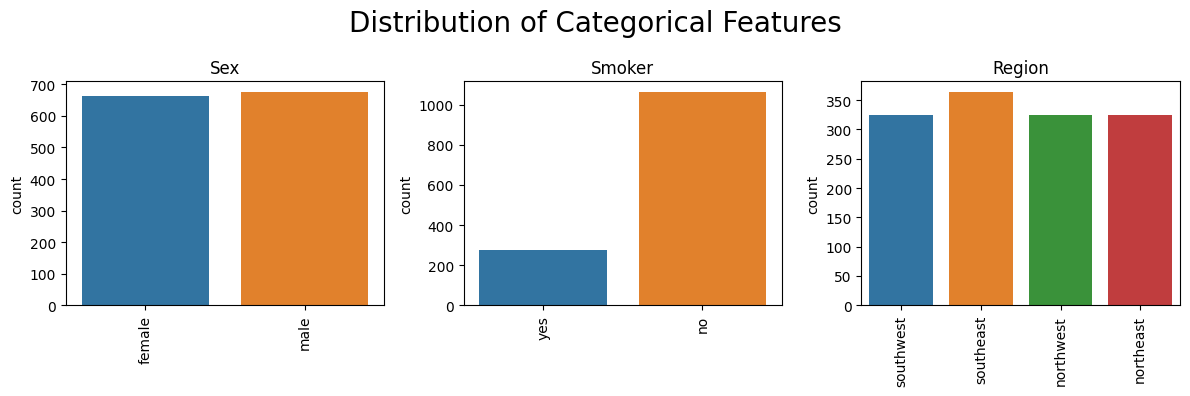

In [44]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(12, 4))
axes = axes.flat

for index, column in enumerate(objcols):
    sns.countplot(
        data=data, 
        x=column, 
        ax=axes[index]
    )
    axes[index].tick_params(axis='x', rotation=90)
    axes[index].set_xlabel('')
    axes[index].set_title(column)
    
plt.suptitle('Distribution of Categorical Features', size=20)
plt.tight_layout()
plt.show()